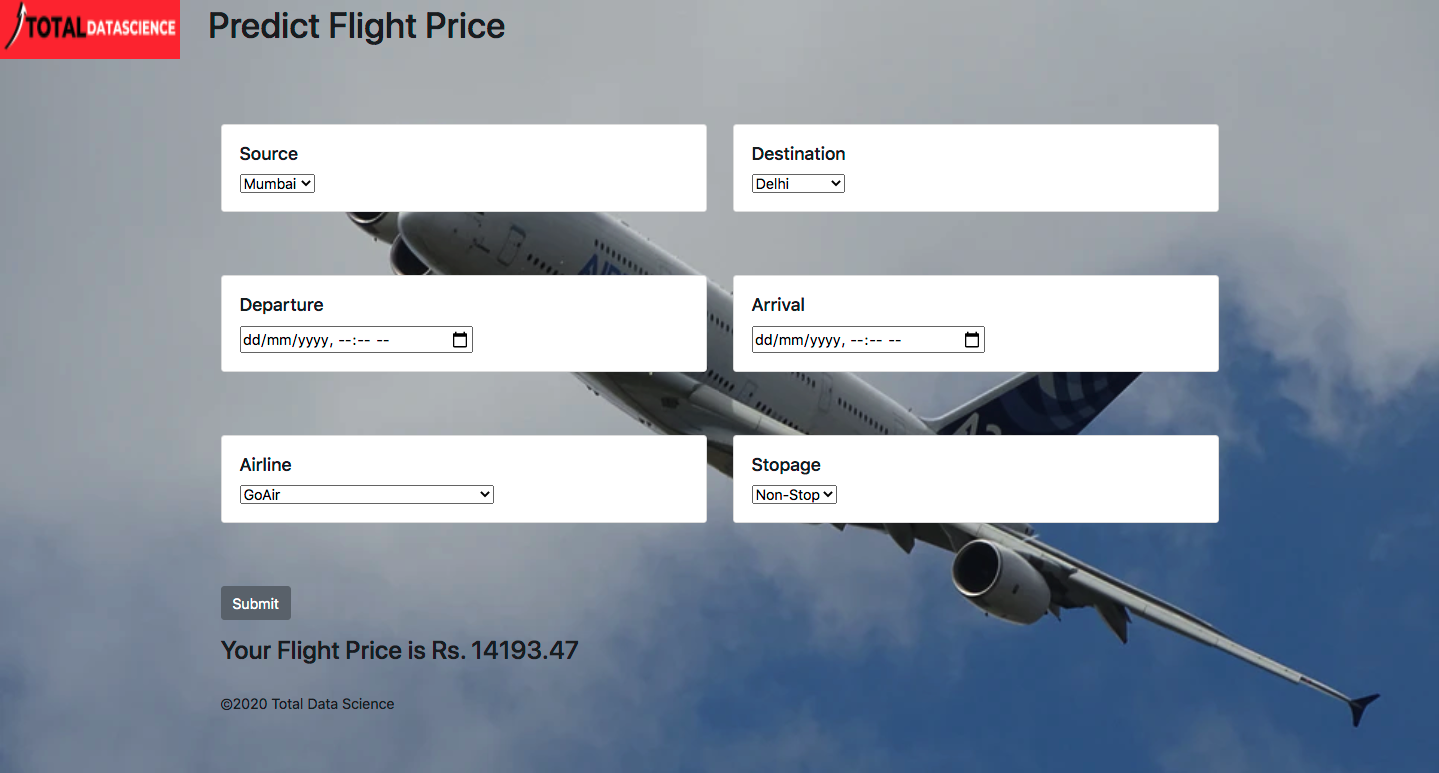

In [1]:
#!pip install chart_studio

In [2]:
#!pip install cufflinks

In [3]:
#!pip install xlrd

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from chart_studio.plotly import plot,iplot
import cufflinks as cf
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [5]:
df=pd.read_excel("Data_Train.xlsx")

In [6]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


## **Automated EDA**

In [7]:
import pandas_profiling as pf

In [8]:
pf.ProfileReport(df)

## **Manual EDA**

In [9]:
df.shape

(10683, 11)

In [10]:
df.dtypes #checking the data types

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [11]:
df.isna().sum() #Checking null values

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [12]:
#Remove the NaN values from the dataset
df.dropna(how='any',inplace=True)
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

<br>
<br>

## **Feature Engineering**

Let's convert **Date_of_Journey** to its appropriate format as **datetime** with regards to **day** and **month**

In [13]:
df.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882


<br>

### Date_of_journey

In [14]:
df['Date_of_Journey']=pd.to_datetime(df['Date_of_Journey'])
df['Day_of_Journey']=(df['Date_of_Journey']).dt.day
df['Month_of_Journey']=(df['Date_of_Journey']).dt.month

In [15]:
df.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9


In [16]:
#we can now drop the Date_of_journey
df.drop(["Date_of_Journey"],axis=1,inplace=True)

<br>
Let's do the same for the other relative columns
<br>

## Dep_time

In [17]:
#covert to datetime
df['Dep_hr']=pd.to_datetime(df['Dep_Time']).dt.hour
df['Dep_min']=pd.to_datetime(df['Dep_Time']).dt.minute

In [18]:
#we can now drop the 'Dep_Time'

df.drop(["Dep_Time"],axis=1,inplace=True)

<br>

## Arrival_time

In [19]:

df['Arrival_hr']=pd.to_datetime(df['Arrival_Time']).dt.hour
df['Arrival_min']=pd.to_datetime(df['Arrival_Time']).dt.minute

In [20]:
#we can now drop the 'Arrival_Time'

df.drop(["Arrival_Time"],axis=1,inplace=True)

<br>

## Duration Time

In [21]:
duration=df['Duration'].str.split(' ',expand=True) #split duration datapoints based on space ' '
duration[1].fillna('00m',inplace=True)   #fill all "NAN" with '00m'
df['duration_hr']=duration[0].apply(lambda x: x[:-1]) #select the item at index o and leave the last one (in this case the 'h')
df['duration_min']=duration[1].apply(lambda x: x[:-1]) #select the item at index 1 and leave the last one (in this case the 'm')

In [22]:
#we can now drop the 'Duration'

df.drop(["Duration"],axis=1,inplace=True)

In [23]:
df.head(3)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,duration_hr,duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,9,25,4,25,19,00


<br>

In [24]:
cf.set_config_file(theme='ggplot',sharing='public',offline=True)

## Count of Airlines

In [25]:
df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

<br>

## Airline vs Price

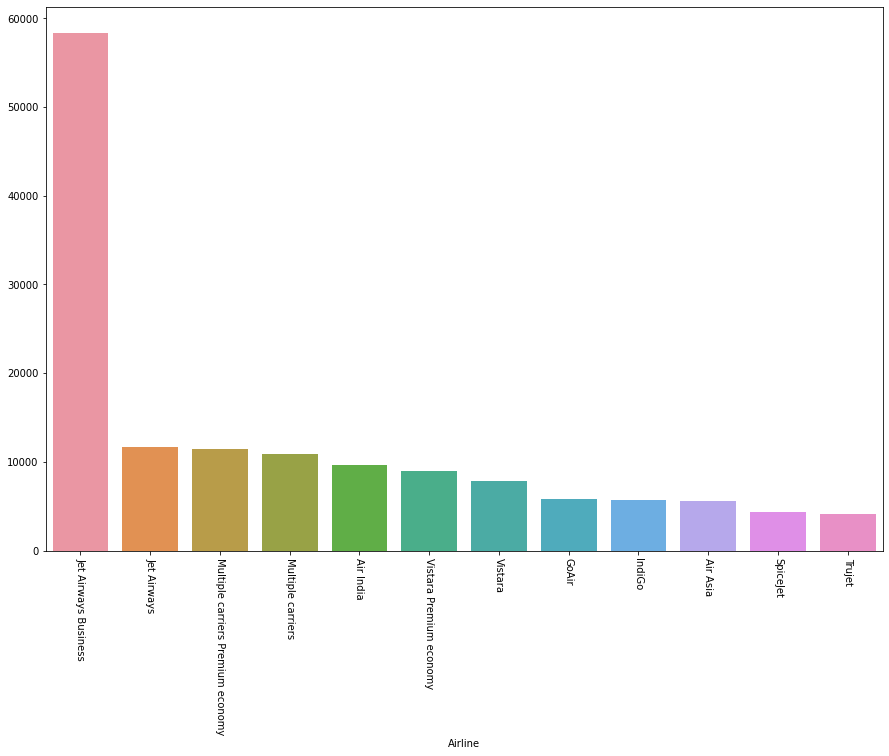

In [26]:
Airprices=df.groupby('Airline')['Price'].mean().sort_values(ascending=False)
plt.figure(figsize=(15,10))
sns.barplot(Airprices.index,Airprices.values)
plt.xticks(rotation=270);

**Jet Airways Business has the highest price with Trujet having the lowest**

<function matplotlib.pyplot.show(close=None, block=None)>

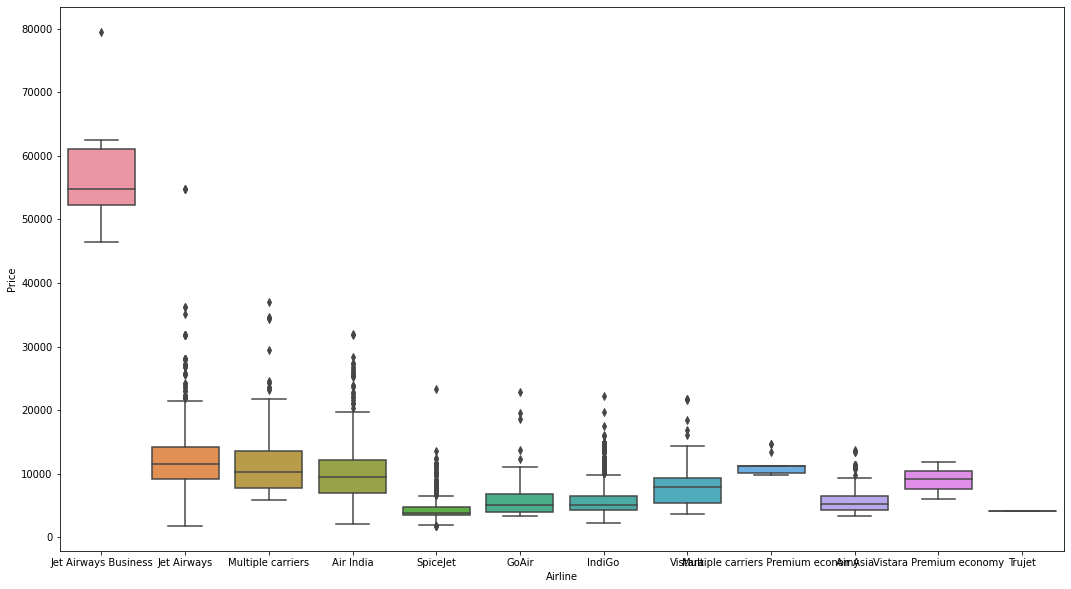

In [27]:
plt.figure(figsize=(18,10))
sns.boxplot(y='Price',x='Airline',data= df.sort_values('Price',ascending=False))
plt.show

<br>

## Price based on number of stops

In [28]:
df.groupby(['Airline','Total_Stops'])['Price'].mean()

Airline                            Total_Stops
Air Asia                           1 stop          7078.325581
                                   2 stops         6341.888889
                                   non-stop        4492.331492
Air India                          1 stop          9041.509259
                                   2 stops        12092.779101
                                   3 stops        12208.054054
                                   4 stops        17686.000000
                                   non-stop        5605.326139
GoAir                              1 stop          6884.676471
                                   non-stop        4726.173913
IndiGo                             1 stop          7104.717528
                                   2 stops         7507.526316
                                   non-stop        4731.174053
Jet Airways                        1 stop         12512.741223
                                   2 stops        13387.247467
        

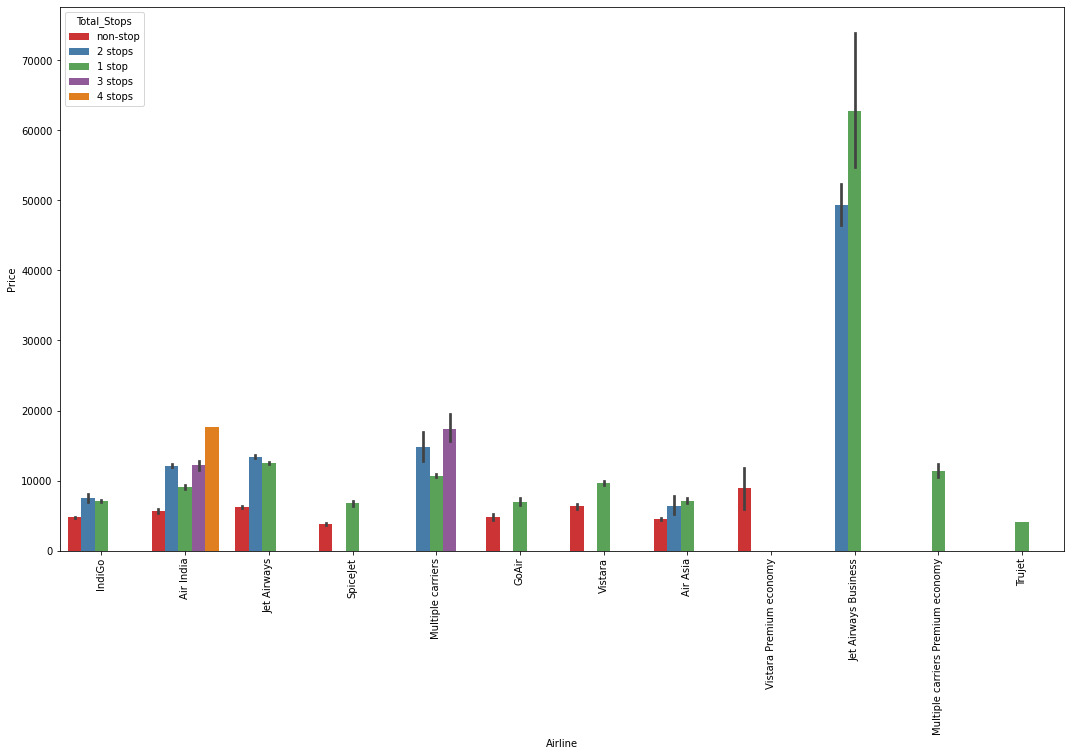

In [29]:
plt.figure(figsize=(18,10))
ax=sns.barplot(x=df['Airline'],y=df['Price'],hue=df['Total_Stops'],palette="Set1")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

**One stop and two stpos Jet Airways Business is having the highest price**

<br>

In [30]:
df['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

<br>

## Source vs Price

<function matplotlib.pyplot.show(close=None, block=None)>

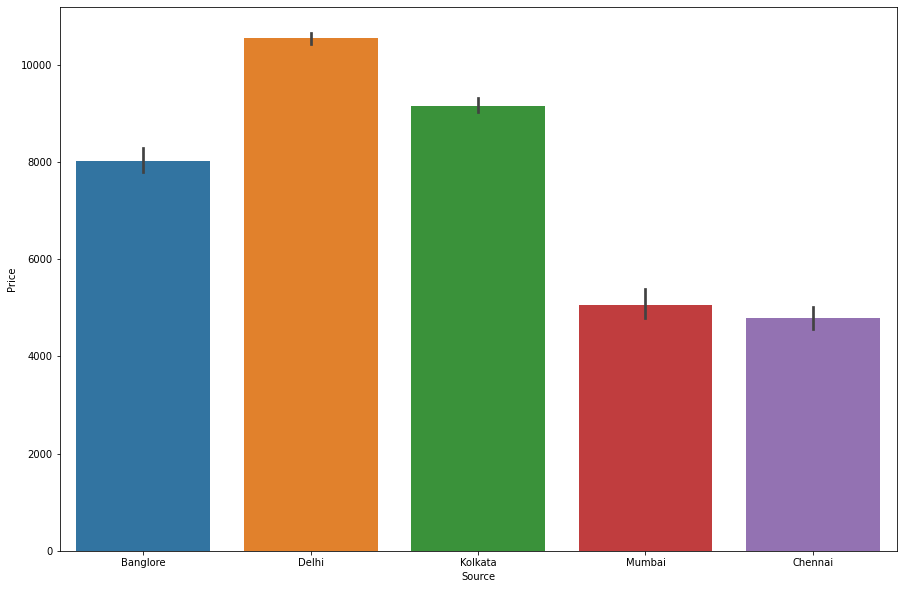

In [31]:
plt.figure(figsize=(15,10))
sns.barplot(y='Price',x='Source',data=df.sort_values('Price',ascending=False))
plt.show

<br>

## Destination vs Price

<function matplotlib.pyplot.show(close=None, block=None)>

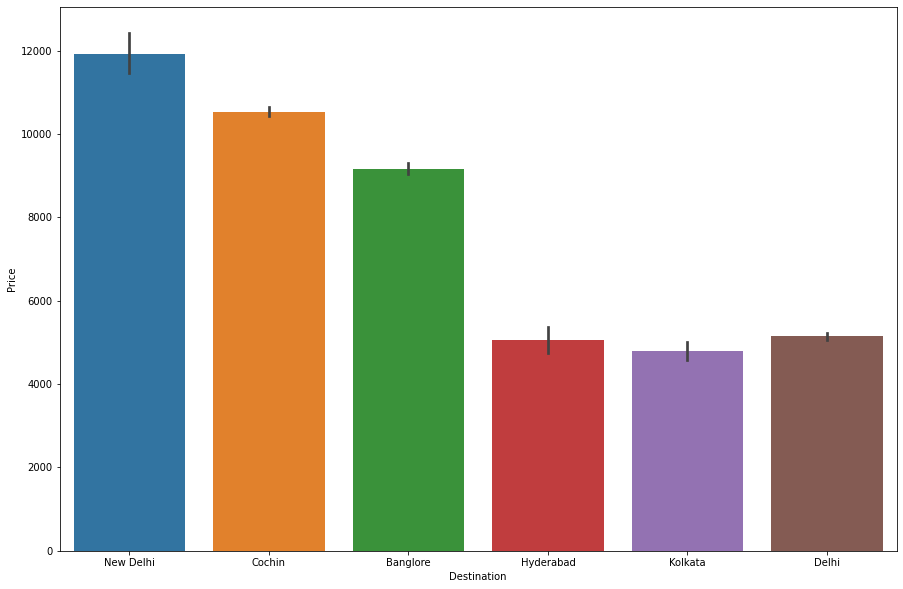

In [32]:
plt.figure(figsize=(15,10))
sns.barplot(y='Price',x='Destination',data=df.sort_values('Price',ascending=False))
plt.show

In [33]:
df['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [34]:
for i in df:
    df.replace('New Delhi','Delhi',inplace=True)

In [35]:
df['Destination'].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

<function matplotlib.pyplot.show(close=None, block=None)>

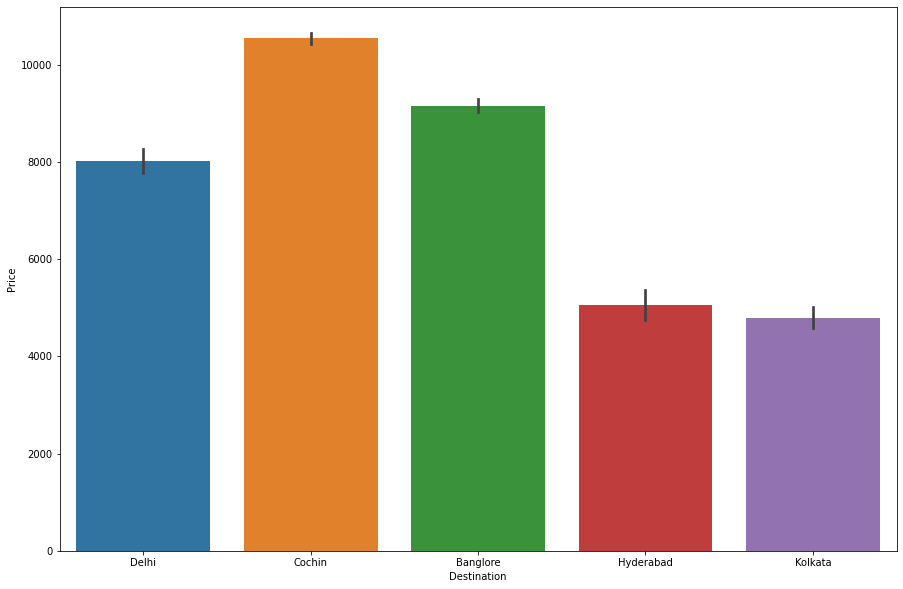

In [36]:
plt.figure(figsize=(15,10))
sns.barplot(y='Price',x='Destination',data=df.sort_values('Price',ascending=False))
plt.show

In [37]:
df['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        2197
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

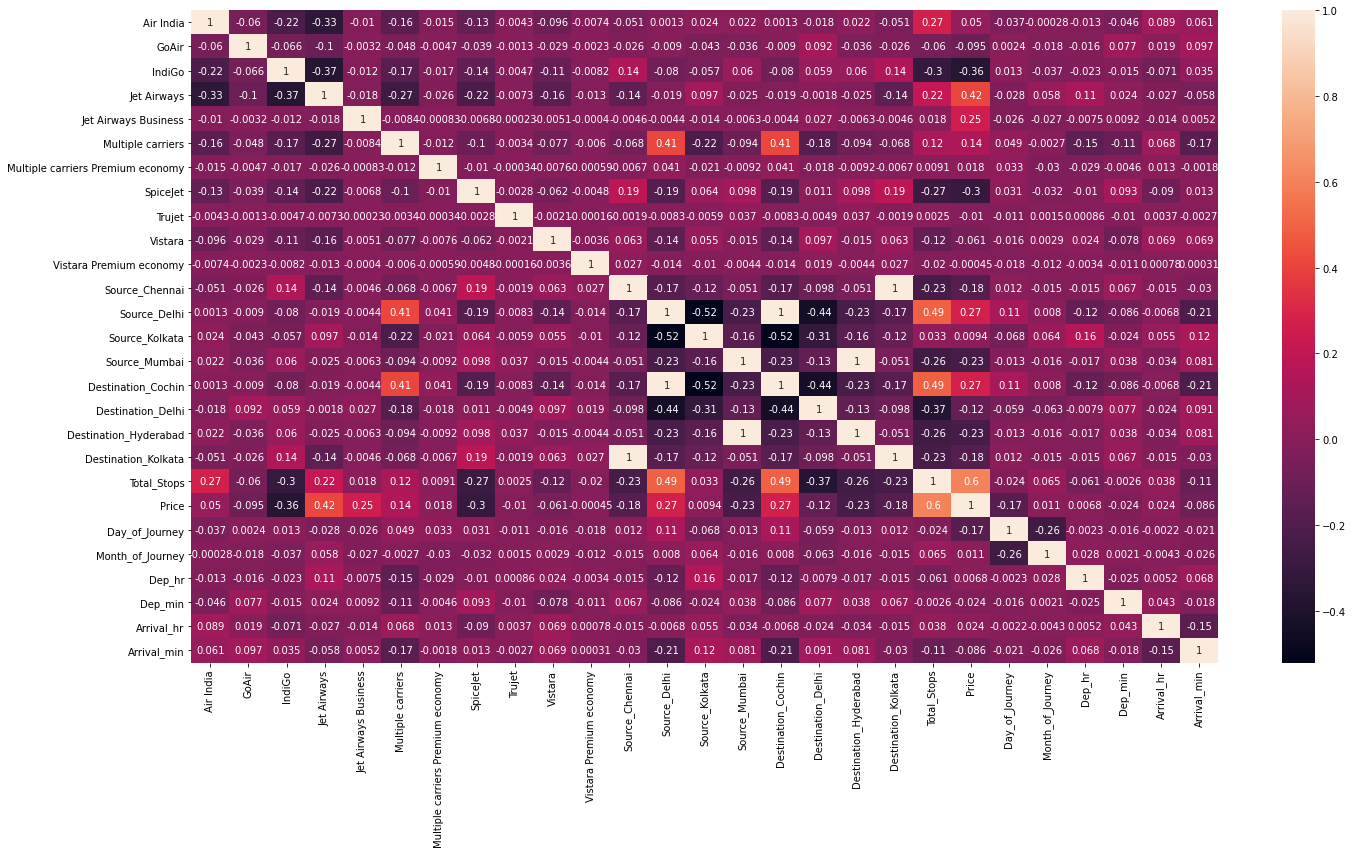

In [76]:
plt.figure(figsize=(23,12))
sns.heatmap(df.corr(),annot=True);

The features are less correlated which is a good thing for us to avoid **Multicollinearity**

<br>
<br>

## Apply Onehot Encoding on the categorical variables

In [39]:
#Handling Categorical Values 
df['Total_Stops']=df['Total_Stops'].map({'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4})
air_dummy=pd.get_dummies(df['Airline'],drop_first=True)
# print(df['Source'].value_counts())
# print(df['Destination'].value_counts())

source_dest_dummy=pd.get_dummies(df[['Source','Destination']],drop_first=True)
df=pd.concat([air_dummy,source_dest_dummy,df],axis=1)

In [40]:
df.drop(['Airline','Source','Destination'],inplace=True,axis=1)

In [41]:
df.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,...,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,duration_hr,duration_min
0,0,0,1,0,0,0,0,0,0,0,...,No info,3897,24,3,22,20,1,10,2,50
1,1,0,0,0,0,0,0,0,0,0,...,No info,7662,5,1,5,50,13,15,7,25
2,0,0,0,1,0,0,0,0,0,0,...,No info,13882,6,9,9,25,4,25,19,00
3,0,0,1,0,0,0,0,0,0,0,...,No info,6218,5,12,18,5,23,30,5,25
4,0,0,1,0,0,0,0,0,0,0,...,No info,13302,3,1,16,50,21,35,4,45


In [42]:
df.shape

(10682, 31)

<br>
<br>
<br>
<br>

# **Test Data**

In [43]:
df_test=pd.read_excel("Test_set.xlsx")

In [44]:
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


<br>

### Let's Perform that same steps as we did for train data earlier

In [45]:
df_test['Date_of_Journey']=pd.to_datetime(df_test['Date_of_Journey'])
df_test['Day_of_Journey']=(df_test['Date_of_Journey']).dt.day
df_test['Month_of_Journey']=(df_test['Date_of_Journey']).dt.month

#Dep_time 
df_test['Dep_hr']=pd.to_datetime(df_test['Dep_Time']).dt.hour
df_test['Dep_min']=pd.to_datetime(df_test['Dep_Time']).dt.minute

#Arrival_time
df_test['Arrival_hr']=pd.to_datetime(df_test['Arrival_Time']).dt.hour
df_test['Arrival_min']=pd.to_datetime(df_test['Arrival_Time']).dt.minute

#Splitting duration  time

a=df_test['Duration'].str.split(' ',expand=True)
a[1].fillna('00m',inplace=True)
df_test['dur_hr']=a[0].apply(lambda x: x[:-1])
df_test['dur_min']=a[1].apply(lambda x: x[:-1])

#dropping the data
df_test.drop(['Date_of_Journey','Duration','Arrival_Time','Dep_Time'],inplace=True,axis=1)

#Handling Categorical Values 
df_test['Total_Stops']=df_test['Total_Stops'].map({'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4})

air_dummy=pd.get_dummies(df_test['Airline'],drop_first=True)
source_dest_dummy=pd.get_dummies(df_test[['Source','Destination']],drop_first=True)
df_test=pd.concat([air_dummy,source_dest_dummy,df_test],axis=1)


In [46]:
df_test.drop(['Airline','Source','Destination','Additional_Info',"Route"],inplace=True,axis=1)

In [47]:
print('train_shape',df.shape)
print('test_shape',df_test.shape)

train_shape (10682, 31)
test_shape (2671, 28)


In [48]:
df.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,...,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,duration_hr,duration_min
0,0,0,1,0,0,0,0,0,0,0,...,No info,3897,24,3,22,20,1,10,2,50
1,1,0,0,0,0,0,0,0,0,0,...,No info,7662,5,1,5,50,13,15,7,25
2,0,0,0,1,0,0,0,0,0,0,...,No info,13882,6,9,9,25,4,25,19,00
3,0,0,1,0,0,0,0,0,0,0,...,No info,6218,5,12,18,5,23,30,5,25
4,0,0,1,0,0,0,0,0,0,0,...,No info,13302,3,1,16,50,21,35,4,45


In [49]:
x=df.drop(['Route', 'Price','Additional_Info'],axis=1)
y=df['Price']

In [50]:
x.head(3)

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,...,Destination_Kolkata,Total_Stops,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,duration_hr,duration_min
0,0,0,1,0,0,0,0,0,0,0,...,0,0,24,3,22,20,1,10,2,50
1,1,0,0,0,0,0,0,0,0,0,...,0,2,5,1,5,50,13,15,7,25
2,0,0,0,1,0,0,0,0,0,0,...,0,2,6,9,9,25,4,25,19,00


<br>
<br>

## **Model Building and Hyperparameter Tuning**

### ExtraTreesRegressor

In [51]:
from sklearn.ensemble import ExtraTreesRegressor
ET_Model=ExtraTreesRegressor()
ET_Model.fit(x,y)

ExtraTreesRegressor()

**Future Importance**

<AxesSubplot:>

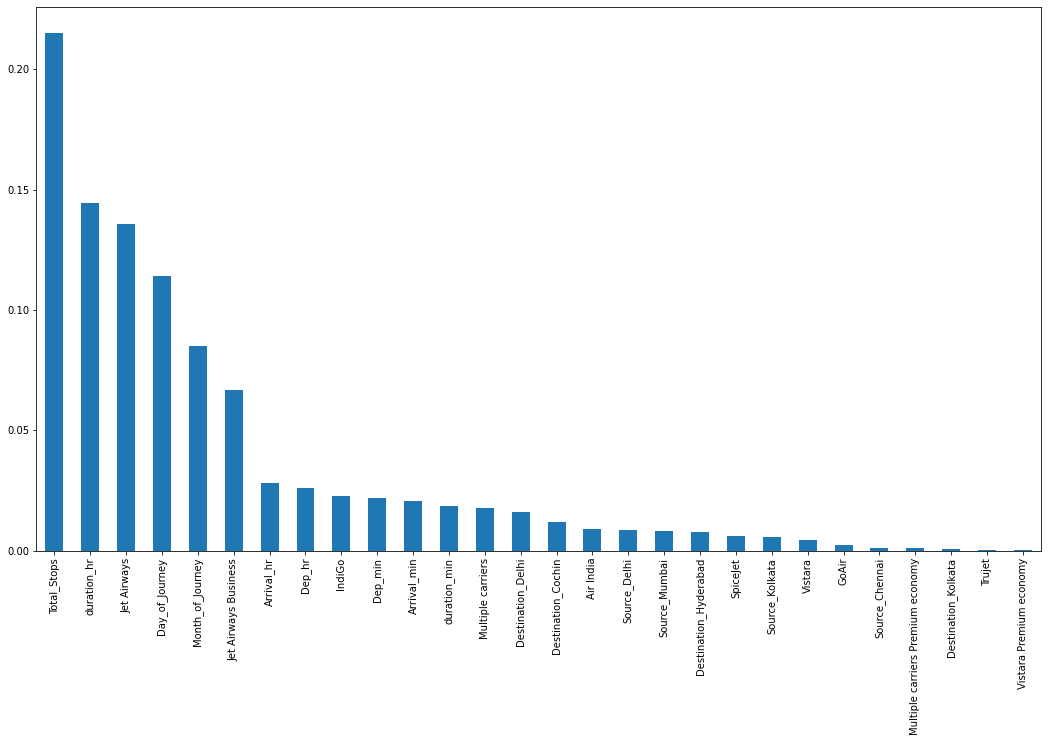

In [52]:
pd.Series(ET_Model.feature_importances_,index=x.columns).sort_values(ascending=False).plot(kind='bar',figsize=(18,10))

In [53]:
#splitting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 50)

In [54]:
#Preparing Extra Tree Regression
from sklearn.ensemble import  ExtraTreesRegressor
ET_Model=ExtraTreesRegressor(n_estimators = 120)
ET_Model.fit(X_train,y_train)
y_predict=ET_Model.predict(X_test)


from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

0.7701777520991928

In [55]:
from sklearn.ensemble import RandomForestRegressor
RF_Model=RandomForestRegressor()
RF_Model.fit(X_train,y_train)
y_predict=RF_Model.predict(X_test)
r2_score(y_test,y_predict)

0.7921290257431279

<br>

**Hyperparameter**

In [56]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 80, stop = 1500, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(6, 45, num = 5)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

# create random grid

rand_grid={'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

rf=RandomForestRegressor()

rCV=RandomizedSearchCV(estimator=rf,param_distributions=rand_grid,scoring='neg_mean_squared_error',n_iter=10,cv=3,random_state=42, n_jobs = 1)

In [57]:
rCV.fit(X_train,y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [6, 15, 25, 35, 45],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [80, 237, 395, 553, 711,
                                                         868, 1026, 1184, 1342,
                                                         1500]},
                   random_state=42, scoring='neg_mean_squared_error')

In [58]:
rf_pred=rCV.predict(X_test)
rf_pred

array([12518.41476449,  4294.2388559 ,  6131.38399135, ...,
       11655.33524325,  9736.56310946,  8643.99737062])

In [59]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print('MAE',mean_absolute_error(y_test,rf_pred))
print('MSE',mean_squared_error(y_test,rf_pred))

MAE 1156.3132365874865
MSE 3963168.2741051647


In [60]:
r2_score(y_test,rf_pred)

0.8069917737112688

In [61]:
!pip install catboost

In [62]:
from catboost import CatBoostRegressor

cat=CatBoostRegressor()
cat.fit(X_train,y_train)

Learning rate set to 0.05718
0:	learn: 4466.5316537	total: 114ms	remaining: 1m 53s
1:	learn: 4319.1952920	total: 130ms	remaining: 1m 4s
2:	learn: 4170.0874200	total: 168ms	remaining: 55.9s
3:	learn: 4033.1061207	total: 174ms	remaining: 43.4s
4:	learn: 3909.5332929	total: 179ms	remaining: 35.7s
5:	learn: 3788.8771850	total: 183ms	remaining: 30.4s
6:	learn: 3677.5795256	total: 187ms	remaining: 26.6s
7:	learn: 3585.9715553	total: 191ms	remaining: 23.7s
8:	learn: 3499.6424958	total: 194ms	remaining: 21.4s
9:	learn: 3408.9602975	total: 198ms	remaining: 19.6s
10:	learn: 3329.4018172	total: 204ms	remaining: 18.3s
11:	learn: 3258.4306577	total: 210ms	remaining: 17.3s
12:	learn: 3188.9732731	total: 215ms	remaining: 16.3s
13:	learn: 3126.6519374	total: 219ms	remaining: 15.4s
14:	learn: 3064.8092738	total: 229ms	remaining: 15.1s
15:	learn: 3011.9738031	total: 233ms	remaining: 14.3s
16:	learn: 2960.0953295	total: 237ms	remaining: 13.7s
17:	learn: 2917.5532184	total: 241ms	remaining: 13.1s
18:	lear

168:	learn: 1931.6124443	total: 1.16s	remaining: 5.71s
169:	learn: 1929.5307514	total: 1.17s	remaining: 5.7s
170:	learn: 1927.4963218	total: 1.17s	remaining: 5.67s
171:	learn: 1925.4669384	total: 1.17s	remaining: 5.65s
172:	learn: 1924.3200339	total: 1.18s	remaining: 5.64s
173:	learn: 1922.7154464	total: 1.19s	remaining: 5.63s
174:	learn: 1920.9589969	total: 1.19s	remaining: 5.6s
175:	learn: 1919.1457003	total: 1.2s	remaining: 5.59s
176:	learn: 1918.1069516	total: 1.2s	remaining: 5.58s
177:	learn: 1916.2214512	total: 1.2s	remaining: 5.56s
178:	learn: 1913.5124519	total: 1.21s	remaining: 5.55s
179:	learn: 1911.4800432	total: 1.21s	remaining: 5.53s
180:	learn: 1909.3957573	total: 1.22s	remaining: 5.51s
181:	learn: 1908.4135607	total: 1.22s	remaining: 5.49s
182:	learn: 1906.5491885	total: 1.23s	remaining: 5.48s
183:	learn: 1904.6147159	total: 1.23s	remaining: 5.46s
184:	learn: 1903.7135890	total: 1.23s	remaining: 5.44s
185:	learn: 1902.4011221	total: 1.24s	remaining: 5.43s
186:	learn: 190

337:	learn: 1729.0852102	total: 1.98s	remaining: 3.88s
338:	learn: 1728.1482089	total: 1.98s	remaining: 3.87s
339:	learn: 1726.7783890	total: 1.99s	remaining: 3.86s
340:	learn: 1726.2547590	total: 1.99s	remaining: 3.85s
341:	learn: 1724.9434243	total: 2s	remaining: 3.84s
342:	learn: 1724.9309222	total: 2s	remaining: 3.83s
343:	learn: 1723.3258449	total: 2.01s	remaining: 3.83s
344:	learn: 1722.4287769	total: 2.01s	remaining: 3.82s
345:	learn: 1721.3414872	total: 2.01s	remaining: 3.81s
346:	learn: 1720.2014300	total: 2.02s	remaining: 3.79s
347:	learn: 1719.6390060	total: 2.02s	remaining: 3.79s
348:	learn: 1718.3140866	total: 2.03s	remaining: 3.78s
349:	learn: 1717.3394270	total: 2.03s	remaining: 3.77s
350:	learn: 1716.4750581	total: 2.04s	remaining: 3.76s
351:	learn: 1714.7302070	total: 2.04s	remaining: 3.75s
352:	learn: 1713.9624067	total: 2.04s	remaining: 3.74s
353:	learn: 1711.8966387	total: 2.05s	remaining: 3.73s
354:	learn: 1710.0600389	total: 2.05s	remaining: 3.73s
355:	learn: 1709

515:	learn: 1596.1793943	total: 2.83s	remaining: 2.65s
516:	learn: 1595.4842590	total: 2.83s	remaining: 2.64s
517:	learn: 1593.9161420	total: 2.83s	remaining: 2.63s
518:	learn: 1593.1073916	total: 2.83s	remaining: 2.63s
519:	learn: 1593.0693129	total: 2.84s	remaining: 2.62s
520:	learn: 1592.2321611	total: 2.84s	remaining: 2.61s
521:	learn: 1591.2905653	total: 2.85s	remaining: 2.6s
522:	learn: 1590.4213259	total: 2.85s	remaining: 2.6s
523:	learn: 1590.3399523	total: 2.85s	remaining: 2.59s
524:	learn: 1589.7436960	total: 2.86s	remaining: 2.58s
525:	learn: 1589.1939304	total: 2.86s	remaining: 2.58s
526:	learn: 1588.8468717	total: 2.86s	remaining: 2.57s
527:	learn: 1588.8433189	total: 2.87s	remaining: 2.56s
528:	learn: 1588.2166192	total: 2.87s	remaining: 2.55s
529:	learn: 1587.6074543	total: 2.87s	remaining: 2.55s
530:	learn: 1586.5424952	total: 2.88s	remaining: 2.54s
531:	learn: 1586.5358638	total: 2.88s	remaining: 2.53s
532:	learn: 1585.6948721	total: 2.89s	remaining: 2.53s
533:	learn: 

676:	learn: 1507.4353868	total: 4.01s	remaining: 1.91s
677:	learn: 1506.6989363	total: 4.02s	remaining: 1.91s
678:	learn: 1506.1226434	total: 4.03s	remaining: 1.91s
679:	learn: 1505.6428927	total: 4.04s	remaining: 1.9s
680:	learn: 1505.3656753	total: 4.05s	remaining: 1.9s
681:	learn: 1504.5243896	total: 4.06s	remaining: 1.89s
682:	learn: 1504.4896435	total: 4.06s	remaining: 1.89s
683:	learn: 1503.9619162	total: 4.08s	remaining: 1.88s
684:	learn: 1503.7882074	total: 4.08s	remaining: 1.88s
685:	learn: 1502.7354588	total: 4.09s	remaining: 1.87s
686:	learn: 1502.2006975	total: 4.09s	remaining: 1.86s
687:	learn: 1501.8801632	total: 4.09s	remaining: 1.86s
688:	learn: 1501.4683597	total: 4.1s	remaining: 1.85s
689:	learn: 1501.2054638	total: 4.13s	remaining: 1.85s
690:	learn: 1500.8709512	total: 4.13s	remaining: 1.85s
691:	learn: 1500.5730072	total: 4.14s	remaining: 1.84s
692:	learn: 1499.7862031	total: 4.15s	remaining: 1.84s
693:	learn: 1499.5505532	total: 4.2s	remaining: 1.85s
694:	learn: 14

835:	learn: 1445.5632822	total: 5.02s	remaining: 985ms
836:	learn: 1445.4024114	total: 5.03s	remaining: 979ms
837:	learn: 1444.9772217	total: 5.03s	remaining: 973ms
838:	learn: 1444.9731111	total: 5.04s	remaining: 967ms
839:	learn: 1444.6856308	total: 5.05s	remaining: 962ms
840:	learn: 1444.6836141	total: 5.05s	remaining: 956ms
841:	learn: 1444.2557845	total: 5.06s	remaining: 950ms
842:	learn: 1443.9635568	total: 5.07s	remaining: 944ms
843:	learn: 1443.5793488	total: 5.08s	remaining: 939ms
844:	learn: 1443.2765572	total: 5.09s	remaining: 933ms
845:	learn: 1442.9203917	total: 5.09s	remaining: 928ms
846:	learn: 1442.5857041	total: 5.1s	remaining: 921ms
847:	learn: 1441.7708073	total: 5.11s	remaining: 916ms
848:	learn: 1441.5323425	total: 5.12s	remaining: 911ms
849:	learn: 1441.1731914	total: 5.13s	remaining: 905ms
850:	learn: 1440.7375024	total: 5.13s	remaining: 899ms
851:	learn: 1440.4006677	total: 5.14s	remaining: 893ms
852:	learn: 1440.3015257	total: 5.14s	remaining: 886ms
853:	learn:

996:	learn: 1396.4053953	total: 5.83s	remaining: 17.6ms
997:	learn: 1395.9340121	total: 5.84s	remaining: 11.7ms
998:	learn: 1395.8518997	total: 5.84s	remaining: 5.85ms
999:	learn: 1395.7331331	total: 5.85s	remaining: 0us


In [63]:
cat_pred=cat.predict(X_test)

In [64]:
r2_score(y_test,cat_pred)

0.8301928561140887

In [65]:
!pip install lightgbm

In [66]:
X_train[['duration_hr','duration_min']]=X_train[['duration_hr','duration_min']].astype(int)
X_test[['duration_hr','duration_min']]=X_test[['duration_hr','duration_min']].astype(int)

In [67]:
from lightgbm import LGBMRegressor

lgb_model = LGBMRegressor()
lgb_model.fit(X_train,y_train)

LGBMRegressor()

In [68]:
lgb_pred=lgb_model.predict(X_test)
r2_score(y_test,lgb_pred)

0.8030064936005559

In [69]:
#!pip install xgboost

In [70]:
import xgboost as xgb
xgb_model=xgb.XGBRegressor()
xgb_model.fit(X_train,y_train)
xgb_pred=xgb_model.predict(X_test)
r2_score(y_test,xgb_pred)

0.8212496826037233

In [71]:
df.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,...,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,duration_hr,duration_min
0,0,0,1,0,0,0,0,0,0,0,...,No info,3897,24,3,22,20,1,10,2,50
1,1,0,0,0,0,0,0,0,0,0,...,No info,7662,5,1,5,50,13,15,7,25
2,0,0,0,1,0,0,0,0,0,0,...,No info,13882,6,9,9,25,4,25,19,00
3,0,0,1,0,0,0,0,0,0,0,...,No info,6218,5,12,18,5,23,30,5,25
4,0,0,1,0,0,0,0,0,0,0,...,No info,13302,3,1,16,50,21,35,4,45


In [72]:
# #Use pickle to save our model so that we can use it later

# import pickle 
# # Saving model to disk
# pickle.dump(CAT_Model, open('model.pkl','wb'))
# model=pickle.load(open('model.pkl','rb'))

In [73]:
df.columns

Index(['Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Trujet', 'Vistara', 'Vistara Premium economy', 'Source_Chennai',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Route', 'Total_Stops', 'Additional_Info', 'Price', 'Day_of_Journey',
       'Month_of_Journey', 'Dep_hr', 'Dep_min', 'Arrival_hr', 'Arrival_min',
       'duration_hr', 'duration_min'],
      dtype='object')

In [74]:
deploy_df=df.drop(['Route','Additional_Info'],axis=1)

In [75]:
deploy_df.to_csv('deploy_df.csv')